This is a Python program that determines and plots the number of ideal steps and the location of the feed of a binary distillation column.  

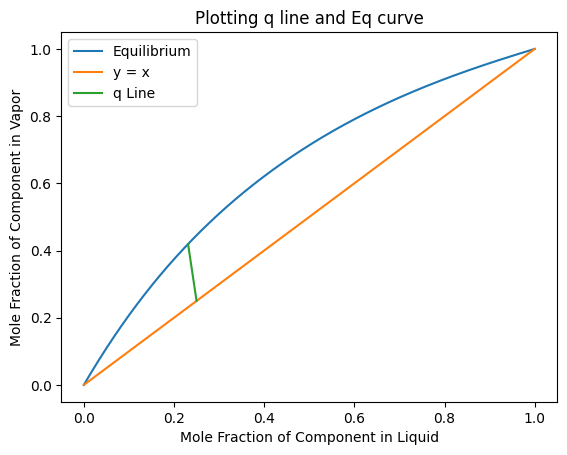

The slope of ROL = Rmin/(1+Rmin) = 0.728
Rmin = 2.68


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

xF = 0.25 #benzene fraction in feed
yD = 0.92 #benzene fraction in distillate
xB = 0.01 #benzene fraction in bottoms product
q = 0.9 #fraction of liquid
qSlope = q/(q-1)
qInter = xF - xF*qSlope
xqEq = 0.2313
yqEq = xqEq*qSlope+qInter
rolSlope = (yD-yqEq)/(yD-xqEq)
Rmin = 1/(1-rolSlope) - 1

xs = [0,0.13,0.258,0.411,0.581,0.78,1] #equilibrium liquid fraction
ys = [0,0.261,0.456,0.632,0.777,0.9,1] #equilibrium vapor fraction

eqLine = make_interp_spline(xs, ys)
xEq = np.linspace(0, 1, 1000)
yEq = eqLine(xEq)

plt.plot(xEq,yEq)
plt.plot(xEq,xEq)
plt.plot([xF,xqEq],[xF,yqEq])
#plt.plot([yD,xqEq],[yD,yqEq])
plt.xlabel("Mole Fraction of Component in Liquid")
plt.ylabel("Mole Fraction of Component in Vapor")
plt.legend(["Equilibrium","y = x","q Line","ROL"])
plt.title("Plotting q line and Eq curve")
plt.show()

print(f"The slope of ROL = Rmin/(1+Rmin) = {rolSlope:0.3f}")
print(f"Rmin = {Rmin:0.2f}")

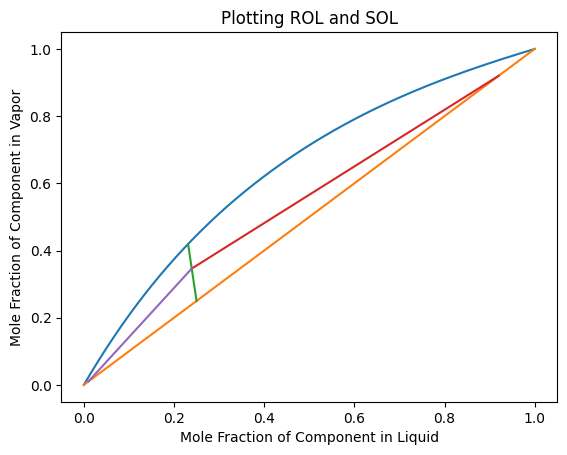

In [23]:
R = Rmin*2
rolSlope = R/(1+R)
rolInter = yD - yD*rolSlope

xxx = np.array([[qSlope, -1], [rolSlope, -1]])
yyy = np.array([-qInter,-rolInter])
xqrol,yqrol = np.linalg.solve(xxx, yyy)
solSlope = (yqrol-xB)/(xqrol-xB)
solInter = xB - xB*solSlope

plt.plot(xEq,yEq)
plt.plot(xEq,xEq)
plt.plot([xF,xqEq],[xF,yqEq])
plt.plot([yD,xqrol],[yD,yqrol])
plt.plot([xB,xqrol],[xB,yqrol])
plt.xlabel("Mole Fraction of Component in Liquid")
plt.ylabel("Mole Fraction of Component in Vapor")
plt.title("Plotting ROL and SOL")
plt.show()

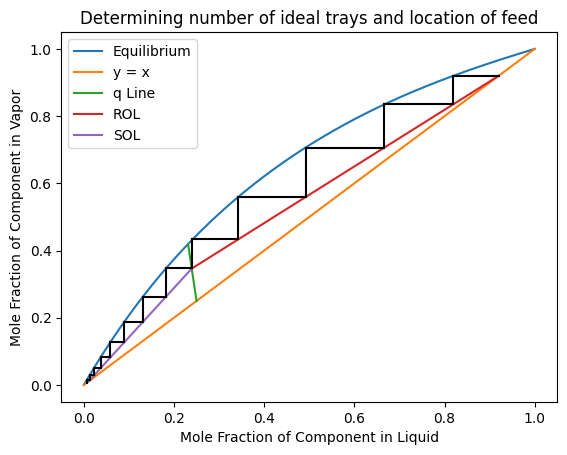

The distillation column requires 12 ideal trays and a boiler
feed is on tray 6


In [24]:
R = Rmin*2
rolSlope = R/(1+R)
rolInter = yD - yD*rolSlope

xxx = np.array([[qSlope, -1], [rolSlope, -1]])
yyy = np.array([-qInter,-rolInter])
xqrol,yqrol = np.linalg.solve(xxx, yyy)
solSlope = (yqrol-xB)/(xqrol-xB)
solInter = xB - xB*solSlope

plt.plot(xEq,yEq)
plt.plot(xEq,xEq)
plt.plot([xF,xqEq],[xF,yqEq])
plt.plot([yD,xqrol],[yD,yqrol])
plt.plot([xB,xqrol],[xB,yqrol])
x = yD
y = yD
eqRev = make_interp_spline(ys, xs)
trays = 0
feedTray = -1
while x > xB:
    xh = eqRev(y)
    plt.plot([x,xh],[y,y],color="black")
    if xh > xqrol:
        yv = xh*rolSlope+rolInter
    else:
        if feedTray == -1:
            feedTray = trays+1
        yv = xh*solSlope+solInter
    plt.plot([xh,xh],[y,yv],color="black")
    x = xh
    y = yv
    trays += 1
plt.xlabel("Mole Fraction of Component in Liquid")
plt.ylabel("Mole Fraction of Component in Vapor")
plt.legend(["Equilibrium","y = x","q Line","ROL","SOL"])
plt.title("Determining number of ideal trays and location of feed")
plt.show()

print(f"The distillation column requires {trays-1} ideal trays and a boiler")
print(f"feed is on tray {feedTray}")